## Visualizing Earnings Based on College Majors

In this project, we will explore data quickly through visualizations using pandas plotting functionality along with the Jupyter notebook interface. 

We will be working with a dataset on the job outcomes of students who graduated from colleges between 2010 and 2012. The original data on job outcomes was released by by [American Community Survey](https://www.census.gov/programs-surveys/acs/), which conducts surveys and aggregates the data. FiveThirtyEight cleaned the original dataset and released it on their [github](https://github.com/fivethirtyeight/data/tree/master/college-majors).

Each row in the datset represents a different major in college and contains information on gender diversity, employment rates, median salaries, etc. Here are some of the columns in the dataset: 

 - *Rank* - Rank by median earnings (the dataset is ordered by this column)
 - *Major_code* - Major code
 - *Major* - Major description
 - *Major_category* - Category of major
 - *Total* - Total number of people with major
 - *Sample_size* - Sample size (unweighted) of full-time
 - *Men* - Male graduates
 - *Women* - Female graduates
 - *ShareWomen* - Women as share of total
 - *Employed* - Number employed
 - *Median* - Median salary of full-time, year-round workers
 - *Low_wage_jobs* - Number in low-wage service jobs
 - *Full_time* - Number employed 35 hours or more
 - *Part_time* - Number employed less than 35 hours
 
Using visualizations, we can start to explore questions from the dataset such as:
 - Do students in more popular majors make more money? 
  * Using scatter plots
 - How many majors are predominantly male? 
  * Using histograms
 - Which category of majors have the most students?
  * Using bar plots

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
recent_grads = pd.read_csv("recent-grads.csv")
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [3]:
# Display top 5 rows
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [4]:
# display bottom 5 rows
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [5]:
# Generate summary statistics for all of the numeric columns
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


## Dropping rows with missing values

Matplotlib expects that columns of values we pass in have matching lengths, so missing values will cause matplotlib to throw errors. 

In [6]:
# Get a summary of dataframe recent_grads
recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
Rank                    173 non-null int64
Major_code              173 non-null int64
Major                   173 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          173 non-null object
ShareWomen              172 non-null float64
Sample_size             173 non-null int64
Employed                173 non-null int64
Full_time               173 non-null int64
Part_time               173 non-null int64
Full_time_year_round    173 non-null int64
Unemployed              173 non-null int64
Unemployment_rate       173 non-null float64
Median                  173 non-null int64
P25th                   173 non-null int64
P75th                   173 non-null int64
College_jobs            173 non-null int64
Non_college_jobs        173 non-null int64
Low_wage_jobs          

Most columns have no missing values. However, the columns *Total*, *Men*, *Women*, and *ShareWomen* have one missing value. Let's drop the rows that conatin missing values.  

In [7]:
raw_data_count = recent_grads.shape[0]
recent_grads = recent_grads.dropna()
cleaned_data_count = recent_grads.shape[0]

print("Rows before cleaning:", raw_data_count, "\nRows after cleaning:",cleaned_data_count)

Rows before cleaning: 173 
Rows after cleaning: 172


## Scatter Plots

We will answer the following questions using scatter plots:
 - Do students in more popular majors make more money?
 - Do students that majored in subjects that were majority female make more money?
 - Is there any link between the number of full-time employees and median salary?

best fit line:
y = 40503.59 + -1.19x


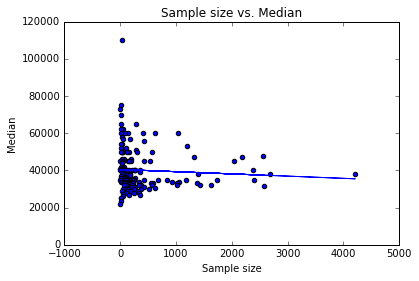

In [8]:
# Best fit line function
def best_fit(X, Y):

    xbar = sum(X) / len(X)
    ybar = sum(Y) / len(Y)
    n = len(X) 

    num = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    den = sum([xi**2 for xi in X]) - n * xbar**2

    b = num / den
    a = ybar - b * xbar

    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))

    return a, b

a, b = best_fit(recent_grads['Sample_size'], recent_grads['Median'])

plt.scatter(recent_grads['Sample_size'], recent_grads['Median'])
yfit = [a + b * xi for xi in recent_grads['Sample_size']]
plt.title('Sample size vs. Median')
plt.xlabel('Sample size')
plt.ylabel('Median')
plt.plot(recent_grads['Sample_size'], yfit)

From the scatter plot of Sample size vs Median, we can see that there is a weak negative linear correlation between the majors that are more popular and median income.So, students in more popular majors don't make more money.  

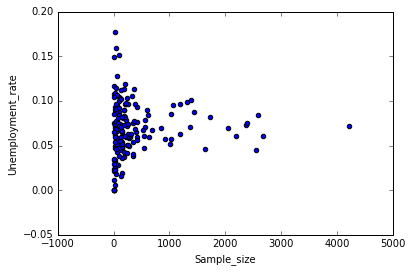

In [9]:
recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter')

best fit line:
y = 40628.48 + -0.02x


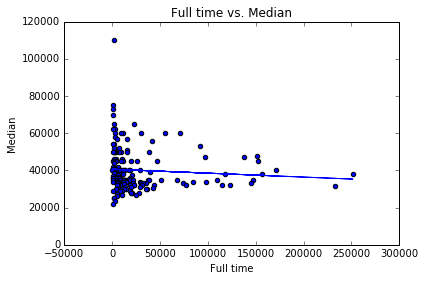

In [10]:
# recent_grads.plot(x='Full_time', y='Median', kind='scatter')
a, b = best_fit(recent_grads['Full_time'], recent_grads['Median'])

plt.scatter(recent_grads['Full_time'], recent_grads['Median'])
yfit = [a + b * xi for xi in recent_grads['Full_time']]
plt.title('Full time vs. Median')
plt.xlabel('Full time')
plt.ylabel('Median')
plt.plot(recent_grads['Full_time'], yfit)

From the scatter plot of Full time vs Median, we can see that there is a weak negative linear correlation between full-time employees and median salary. As the number of full-time employees increases, the median salary decreases.

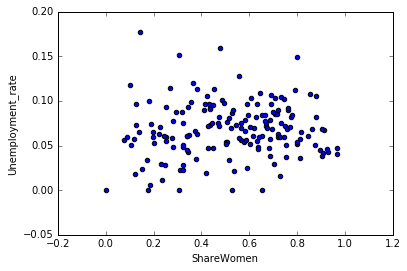

In [11]:
recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter')

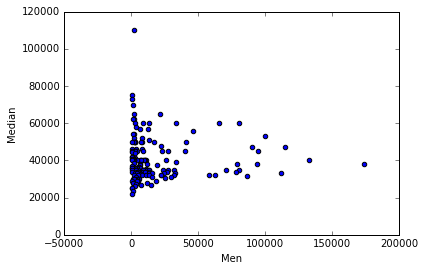

In [12]:
recent_grads.plot(x='Men', y='Median', kind='scatter')

best fit line:
y = 41232.66 + -0.05x


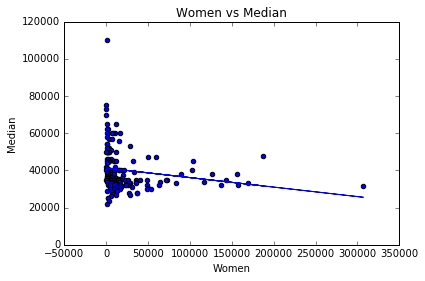

In [ ]:
a, b = best_fit(recent_grads['Women'], recent_grads['Median'])

plt.scatter(recent_grads['Women'], recent_grads['Median'])
yfit = [a + b * xi for xi in recent_grads['Women']]
plt.title('Women vs Median')
plt.xlabel('Women')
plt.ylabel('Median')
plt.plot(recent_grads['Women'], yfit)

From the scatter plot of Women vs Median, we can see that there is a moderately negative linear correlation between number of female graduates and median salary. So, the students that majored in subjects that were majority females, don't make more money.

## Histograms

In [ ]:
cols = ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]

fig = plt.figure(figsize=(18, 10)) 
for r in range(0, 4):
    ax = fig.add_subplot(2, 2, r+1)
    ax = recent_grads[cols[r]].hist()
    ax.set_xlabel(cols[r])

In [ ]:
fig = plt.figure(figsize=(18, 10))
for r in range(4, 8):
    ax = fig.add_subplot(2, 2, r-3)
    ax = recent_grads[cols[r]].hist()
    ax.set_xlabel(cols[r])

Using the plots, we will explore the following questions:
 - What percent of majors are predominantly male and predominantly female?
 - What is the most common median salary range?

In [ ]:
mostly_female = recent_grads["ShareWomen"] > 0.5
mostly_female.value_counts()

In [ ]:
76/96 * 100

From the data, we can see that approximately 80% of majors are predmonantly female and the remaining 20% of majors are predominantly male.

From the histogram of Median, we can see that the most common median salary range is \$30,000 - $40,000. 

## Scatter Matrix Plot

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(recent_grads[['Women', 'Men']], figsize=(10,10))

In [ ]:
scatter_matrix(recent_grads[["Sample_size", "Median", "Unemployment_rate"]], figsize=(10,10))

## Bar Plots

Let's compare the percentages of women in top ten highest paying majors and the percentages of women in ten least paying majors.

In [ ]:
recent_grads[:10].plot.barh(x='Major', y='ShareWomen', legend=False, title='10 Highest Paying Majors')
plt.xlabel('Percentage of Female Students')

In [ ]:
recent_grads[162:].plot.barh(x='Major', y='ShareWomen', legend=False, title='10 Lowest Paying Majors')
plt.xlabel('Percentage of Female Students')

From the above bar plots, we can see that women are under represented in the highest paying majors and over represented in the lowest paying majors.

Now, let's compare the unemployment rate in top ten highest paying majors and the unemployment rate in ten least paying majors.

In [ ]:
recent_grads[:10].plot.barh(x='Major', y='Unemployment_rate', legend=False, title='Unemployment Rate in Top 10 Highest Paying Majors')

In [ ]:
recent_grads[162:].plot.barh(x='Major', y='Unemployment_rate', legend=False, title='Unemployment Rate in 10 Lowest Paying Majors')

## Grouped Bar Plot

We will use a grouped bar plot to compare the number of men with the number of men with the number of women in each category of majors. 

In [ ]:
# Create a spreadsheet-style pivot table as a DataFrame
pivot_table = recent_grads.pivot_table(index='Major_category', values=['Men', 'Women'], aggfunc=np.sum)
pivot_table

In [ ]:
pivot_table.plot.bar(x = pivot_table.index, y=['Men', 'Women'])

From the above grouped bar plot, we can see that the number of men is significantly greater than that of women in major categories - Computers & Mathematics and Engineering. However, the number of women is considerably higher than that of men in major categories - Arts, Biology & Life Science, Communications & Journalism, Education, Health, and Psychology & Social Work.    

## Exploring the distributions of median salaries and unemployment rate

Let's use a box plot to explore the distributions of median salaries and unemployment rate.

In [ ]:
recent_grads['Median'].plot.box(vert=False)

From the box plot, we can see that the majority of recent graduates are making around \$35,000 - $45,000. 

In [ ]:
recent_grads['Unemployment_rate'].plot.box(vert=False)

From the box plot, we can see that: 
 - the unemployment rate for recent graduates ranges from 0 to 13%.
 - the median unemployment rate is 7%.
 - the majority of unemployment lie between 5% to 9%.
 - the bottom 25% unemployment rate ranges from 0 to 5%, whereas the top 25% unemployment rate ranges from 9% to 13%.

## Hexagonal Bin Plot

Using a hexagonal plot, we will visualize the columns that had dense scatter plots.

In [ ]:
recent_grads.plot.hexbin(x='Sample_size', y='Median', gridsize=20)

In [ ]:
recent_grads.plot.hexbin(x='Sample_size', y='Unemployment_rate', gridsize=20)

From the above hexagonal plots, we can see that:
 - most recent graduates are making around \$35,000 - $45,000 in a year.
 - the most common unemployment rate ranges between 5% to 9%.

In this project, we used the plotting tools built into pandas to explore data on earnings based on college majors. In the future, we will use machine learning models to train and predict earnings based on college majors. 